In [4]:
%cd /home/ashapiro/Hate_speech_task/

/home/ashapiro/Hate_speech_task


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns 
plt.style.use('ggplot')

## Downloading Dataset

In [ ]:
# !wget -O Data/train.txt https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-train.txt
# !wget -O Data/test.txt https://alt.qcri.org/resources/OSACT2022/OSACT2022-sharedTask-dev.txt

In [5]:
def read_data(file):
    k = {'Tweet':[],'Offensive':[],'HSL':[], 'Vulgar':[], 'Violence':[]}
    lines = open(file,"r").readlines()
    for i,line in enumerate(lines):
        line = line.split("\t")
        if len(line) != 6:
            print(f"failed at {i}") 
        k['Tweet'].append(line[1].strip())
        k['Offensive'].append(line[2].strip())
        k['HSL'].append(line[3].strip())
        k['Vulgar'].append(line[4].strip())
        k['Violence'].append(line[5].strip())
        
    return pd.DataFrame.from_dict(k)

## Loading Data and Task Division

In [6]:
train = read_data(file = "Data/train.txt")
test =  read_data(file = "Data/test.txt" )
train.head()

,Tweet,Offensive,HSL,Vulgar,Violence
0,@USER ردينا ع التطنز 😏👊🏻,OFF,NOT_HS,NOT_VLG,NOT_VIO
1,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
2,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,OFF,NOT_HS,NOT_VLG,NOT_VIO
3,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
4,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO


Each row is formated accordingly


| Index | Tweet | Offensive    | Hate Speech Label| Vulgar | Voilence |  
|---:|:-------------|:-----------|:------|:------|:------|
| 0 | @USER من زمان ونحن ندعس بلدكم دعس  | OFF       | HS1   | NOT_VLG     | NOT_VIOO     |
| 1 | وصارت فطاير البقالات غذاء صحي | NOT_OFF       | NOT_HS   | NOT_VLG     | NOT_VIO     |


We will split the train and val datasets into the coressponding subtasks 


---

**Subtask A** : Detect whether a tweet is offensive or not.
</br> Labels for this task are: OFF (Offensive) or NOT_OFF (Not Offensive)
</br> Instead will replace labels to be : 1 (Offensive) or 0 (Not Offensive)
</br> Example: الله يلعنه على هالسؤال (May God curse him for this question! )


---
**Subtask B**: Detect whether a tweet has hate speech or not.
</br> Labels are: HS (Hate Speech) or NOT_HS (Not Hate Speech).
</br> Instead will replace labels to be : HS (Hate Speech) or NOT_HS (Not Hate Speech).
</br> Example: أنتم شعب متخلف (You are a retarded people)

---
**Subtask C**: Detect the fine-grained type of hate speech.
</br> Labels are: HS1 (Race), HS2 (Religion), HS3 (Ideology), HS4 (Disability), HS5 (Social Class), and HS6 (Gender).


In [7]:
def split(df):
    df = df.copy(deep=True)
    df['Offensive'] = df.Offensive.apply(lambda x: 1 if x == "OFF" else 0)
    df['HS'] = df.HSL.apply(lambda x: 0 if x == "NOT_HS" else 1)
    df['HSL'] = df.HSL.apply(lambda x: 0 if x == "NOT_HS" else int(list(x)[-1]) )
    df.Vulgar = df.Vulgar.apply(lambda x: 1 if x == "VLG" else 0)
    df.Violence = df.Violence.apply(lambda x: 1 if x == "VIO" else 0)

    return df[['Tweet', 'Offensive']], df[['Tweet', 'HS']], df[['Tweet', 'HSL']] #returns data from subtaskA, subtaskB, and subtaskC respecitvally 

In [8]:
trainA, trainB, trainC = split(train)

In [9]:
train.head()

,Tweet,Offensive,HSL,Vulgar,Violence
0,@USER ردينا ع التطنز 😏👊🏻,OFF,NOT_HS,NOT_VLG,NOT_VIO
1,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
2,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,OFF,NOT_HS,NOT_VLG,NOT_VIO
3,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO
4,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,NOT_OFF,NOT_HS,NOT_VLG,NOT_VIO


In [10]:
trainA.head()

,Tweet,Offensive
0,@USER ردينا ع التطنز 😏👊🏻,1
1,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,0
2,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,1
3,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,0
4,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,0


In [18]:
trainB.head()

,Tweet,HS
0,@USER ردينا ع التطنز 😏👊🏻,0
1,وصارت فطاير البقالات غذاء صحي 👎🏻 URL,0
2,@USER روحي لبريده تلقين اشباه كثير بس ماحد زيك...,0
3,@USER مش باين حاجه خالص 😣<LF>مش عارف بقى 😔,0
4,#اليوم_الاثنين<LF><LF>👏 يقولك :%90 من المسلمي...,0


In [12]:
testA, testB, testC = split(test)

In [13]:
testA

,Tweet,Offensive
0,@USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂,0
1,#داليا_مبارك<LF>مادري ليش تقرفت😷,0
2,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,0
3,@USER هييه والله وااايدد 🔪🔪🔪💔💔,0
4,اكيد اخس شي 😤 URL,0
...,...,...
1265,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,0
1266,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,1
1267,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,1
1268,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,1


In [14]:
testB

,Tweet,HS
0,@USER افطرت عليك بعقاء واثنين من فروخها الجن 🔪😂,0
1,#داليا_مبارك<LF>مادري ليش تقرفت😷,0
2,RT @USER ابديت السناب الجديد ❌<LF>حاس الناس ح...,0
3,@USER هييه والله وااايدد 🔪🔪🔪💔💔,0
4,اكيد اخس شي 😤 URL,0
...,...,...
1265,@USER روما محظوظين بذا المدرب بيروتي يسحب في ر...,0
1266,@USER هلا والله بالحب<LF>هلا لولو❤️😙<LF>...<LF...,0
1267,رينز فاز 😡😡😡😡😡😡😡 يعنني اوه شوفو العرض الأسطوري...,0
1268,@USER ييييع والله شيء يلوع الكبد مريضات الله ي...,0


In [15]:
sorted(testC.HSL.unique())

[0, 1, 2, 3, 4, 5, 6]

In [16]:
sorted(trainC.HSL.unique())

[0, 1, 2, 3, 5, 6]

**We can see that we're missing class 4 from the training data**

## EDA

Relationship between features

In [20]:
trainB['HS']

0       0
1       0
2       0
3       0
4       0
       ..
8882    0
8883    0
8884    0
8885    0
8886    0
Name: HS, Length: 8887, dtype: int64

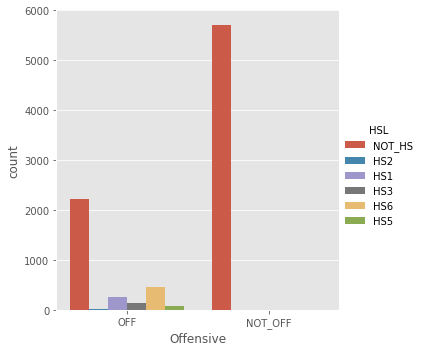

In [26]:
sns.catplot(data=train, kind='count', x='Offensive', hue='HSL');

not offensive tweets are also not hatespeech 
but offensive tweets maybe or not be hatespeech

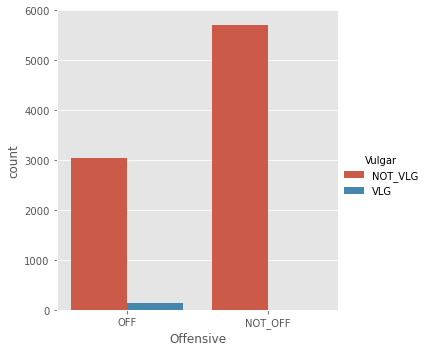

In [16]:
sns.catplot(data=train, kind='count', x='Offensive', hue='Vulgar');

Vulgar are also offensive, but offesnsive doesn't have to be vulgar

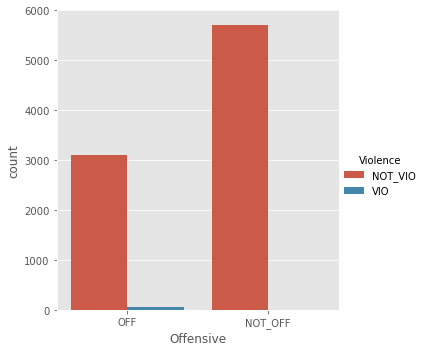

In [17]:
sns.catplot(data=train, kind='count', x='Offensive', hue='Violence');

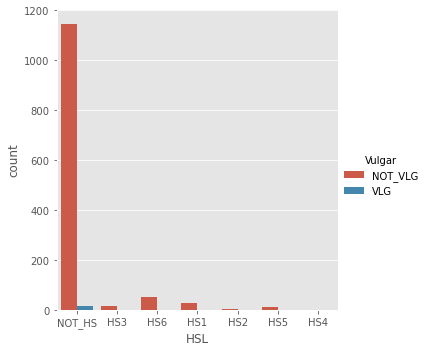

In [18]:
sns.catplot(data=test, kind='count', x='HSL', hue='Vulgar');

Violence are also offensive, but offesnsive doesn't have to be Violence

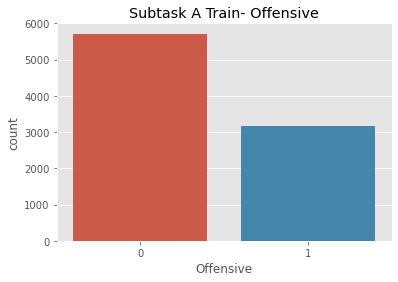

In [19]:
sns.countplot(x=trainA.Offensive).set(title='Subtask A Train- Offensive');

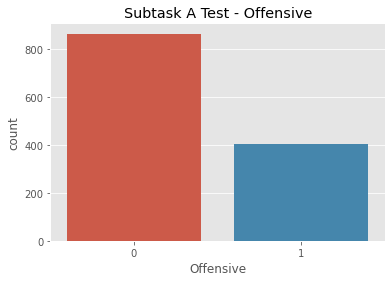

In [20]:
sns.countplot(x=testA.Offensive).set(title='Subtask A Test - Offensive');

In [21]:
trainOffensiveRate = trainA.Offensive.sum()/len(trainA.Offensive)
testOffensiveRate = testA.Offensive.sum()/len(testA.Offensive)
trainOffensiveRate, testOffensiveRate 

(0.3569258467424328, 0.31811023622047246)

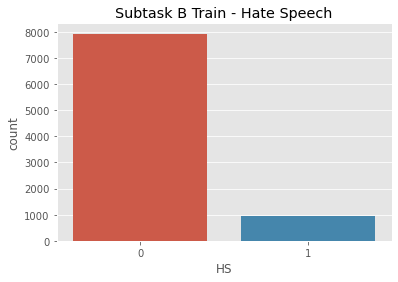

In [22]:
sns.countplot(x=trainB.HS).set(title='Subtask B Train - Hate Speech');

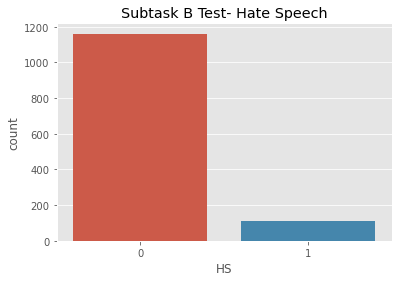

In [23]:
sns.countplot(x=testB.HS).set(title='Subtask B Test- Hate Speech');

In [24]:
trainHSRate = trainB.HS.sum()/len(trainB.HS)
testHSRate = testB.HS.sum()/len(testB.HS)
trainHSRate, testHSRate 

(0.1079104309665804, 0.08582677165354331)

We can see a huge class imbalance between Hate Speech

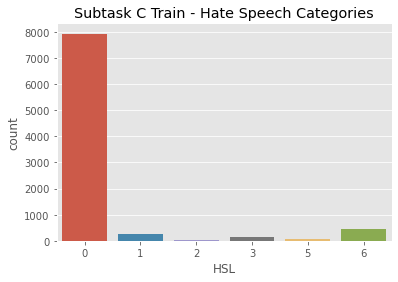

In [25]:
sns.countplot(x=trainC.HSL).set(title='Subtask C Train - Hate Speech Categories');

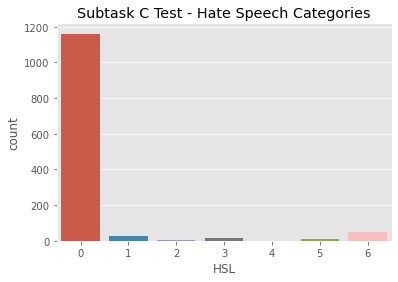

In [26]:
sns.countplot(x=testC.HSL).set(title='Subtask C Test - Hate Speech Categories');

In [27]:
counts = dict(Counter(trainC.HSL))
total = len(trainC)
HateSpeechLevelsPercentages = {k: "{}%".format((v/total)*100) for k, v in counts.items()}
HateSpeechLevelsPercentages[4] = "0%"
HateSpeechLevelsPercentages

{0: '89.20895690334196%',
 2: '0.30381456059412626%',
 1: '2.9256216946101046%',
 3: '1.6203443231686734%',
 6: '5.131090356700799%',
 5: '0.8101721615843367%',
 4: '0%'}

In [28]:
counts = dict(Counter(testC.HSL))
total = len(testC)
HateSpeechLevelsPercentages = {k: "{}%".format((v/total)*100) for k, v in counts.items()}
HateSpeechLevelsPercentages

{0: '91.41732283464566%',
 3: '1.1023622047244095%',
 6: '4.094488188976378%',
 1: '2.204724409448819%',
 2: '0.31496062992125984%',
 5: '0.7874015748031495%',
 4: '0.07874015748031496%'}

In [29]:
trainA.rename(columns={"Tweet":"text", "Offensive":"labels"}).to_csv("Data/trainA.csv",index=False)
testA.rename(columns={"Tweet":"text", "Offensive":"labels"}).to_csv("Data/testA.csv",index=False)

trainB.rename(columns={"Tweet":"text", "HS":"labels"}).to_csv("Data/trainB.csv",index=False)
testB.rename(columns={"Tweet":"text", "HS":"labels"}).to_csv("Data/testB.csv",index=False)

trainC.rename(columns={"Tweet":"text", "HSL":"labels"}).to_csv("Data/trainC.csv",index=False)
testC.rename(columns={"Tweet":"text", "HSL":"labels"}).to_csv("Data/testC.csv",index=False)